# ロジスティック回帰

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

In [11]:
n_sample = 100
harf_n_sample = 50
var = .2

def gen_data(n_sample, harf_n_sample):
    x0 = np.random.normal(size=n_sample).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=n_sample).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(harf_n_sample), np.ones(harf_n_sample)]).astype(np.int)
    return x_train, y_train

def plt_data(x_train, y_train):
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.legend()

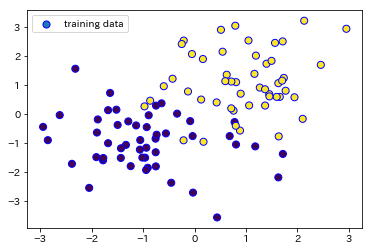

In [12]:
#データ作成
x_train, y_train = gen_data(n_sample, harf_n_sample)
#データ表示
plt_data(x_train, y_train)

## ロジスティック回帰モデル

識別モデルとして$p(y=1 | \boldsymbol{x}; \boldsymbol{w}) = \sigma (\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x})$を用いる。

ただし、$\sigma(\cdot)$はシグモイド関数であり、$\sigma(h) = \frac{1}{1 + \exp{(-h)}}$で定義される。

また、陽には書かないが、$\boldsymbol{x}$には定数項のための$1$という要素があることを仮定する。

## 学習

訓練データ$X = [\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, ..., \boldsymbol{x}_{n}]^{\mathrm{T}}, \boldsymbol{y} = [y_{1}, y_{2}, ..., y_{n}]^{\mathrm{T}} (y_{i} = \{0, 1\})$に対して尤度関数$L$は以下のように書ける。

$L(\boldsymbol{w}) = \prod_{i=1}^{n} p(y_{i}=1 | \boldsymbol{x}_{i}; \boldsymbol{w})^{y_{i}} (1 - p(y_{i}=1 | \boldsymbol{x}_{i}; \boldsymbol{w}))^{1 - y_{i}}$

負の対数尤度関数は

$- \log{L(\boldsymbol{w})} = - \sum_{i=1}^{n} \left[ y_{i} \log{p(y_{i}=1 | \boldsymbol{x}_{i}; \boldsymbol{w})} + (1 - y_{i}) \log{(1 - p(y_{i}=1 | \boldsymbol{x}_{i}; \boldsymbol{w}))} \right]$

のように書ける。 これを最小化する$\boldsymbol{w}$を求める。

$\frac{d \sigma(h)}{d h} = \sigma(h)(1 - \sigma(h))$と書けることを考慮し、負の対数尤度関数を$\boldsymbol{w}$で偏微分すると、

\begin{eqnarray}
\frac{\partial }{\partial \boldsymbol{w}} (-\log{L(\boldsymbol{w})}) &=& -\sum_{i=1}^{n} \left[ y_{i} (1 - \sigma(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i})) - (1 - y_{i}) \sigma(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}) \right] \boldsymbol{x}_{i}  \\
&=& \sum_{i=1}^{n} \left( \sigma(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}) - y_{i} ) \right) \boldsymbol{x}_{i}
\end{eqnarray}

この式が$0$となる$\boldsymbol{w}$は解析的に求められないので、今回は$-\log{L(\boldsymbol{w})}$の最小化問題を最急降下法を用いて解く。

最急降下法では学習率を$\eta$とすると、以下の式で$\boldsymbol{w}$を更新する。

$\boldsymbol{w} \leftarrow \boldsymbol{w} - \eta \frac{\partial }{\partial \boldsymbol{w}} (-\log{L(\boldsymbol{w})})$

In [13]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sgd(X_train, max_iter, eta):
    w = np.zeros(X_train.shape[1])
    for _ in range(max_iter):
        w_prev = np.copy(w)
        sigma = sigmoid(np.dot(X_train, w))
        grad = np.dot(X_train.T, (sigma - y_train))
        w -= eta * grad
        if np.allclose(w, w_prev):
            return w
    return w

X_train = add_one(x_train)
max_iter=100
eta = 0.01
w = sgd(X_train, max_iter, eta)

## 予測

入力に対して、$y=1$である確率を出力する。よって

$p(y=1 | \boldsymbol{x}; \boldsymbol{w}) = \sigma (\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x})$の値が

$0.5$より大きければ1に、小さければ0に分類する。

In [15]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

In [16]:
X_test = add_one(xx)
proba = sigmoid(np.dot(X_test, w))
y_pred = (proba > 0.5).astype(np.int)

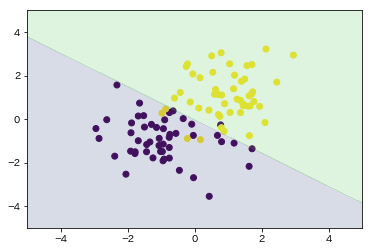

In [17]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))

C:\Users\takam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


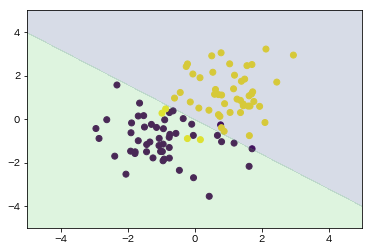

In [18]:
#numpy実装

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True)
model.fit(x_train, y_train)
proba = model.predict_proba(xx)
y_pred = (proba > 0.5).astype(np.int)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba[:, 0].reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))